In [1]:
import pandas as pd

In [2]:
# Load train datasets
train_df = pd.read_csv(r'E:\epic\train.csv')

# Display the first few rows of the train dataset
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Load test datasets
test_df = pd.read_csv(r'E:\epic\test.csv')
# Display the first few rows of the test dataset
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Inspect the Data

In [4]:
# Basic information about the train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Summary statistics of the train dataset
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Check for missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handle Missing Values

In [7]:
# Fill missing 'Age' values with the median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [8]:
# Fill missing 'Embarked' values with the mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [9]:
# Fill missing 'Fare' values in the test set with the median fare
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [10]:
# Check for any remaining missing values
train_df.isnull().sum(), test_df.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         0
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          327
 Embarked         0
 dtype: int64)

# Feature Engineering

In [12]:
# Extract titles from names
train_df['Title'] = train_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_df['Title'] = test_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [13]:
# Create family size feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Exploratory Data Analysis (EDA)


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

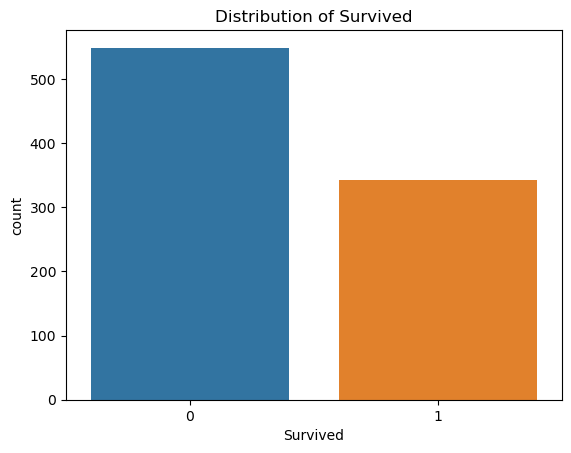

In [15]:
# Univariate analysis of 'Survived'
sns.countplot(x='Survived', data=train_df)
plt.title('Distribution of Survived')
plt.show()

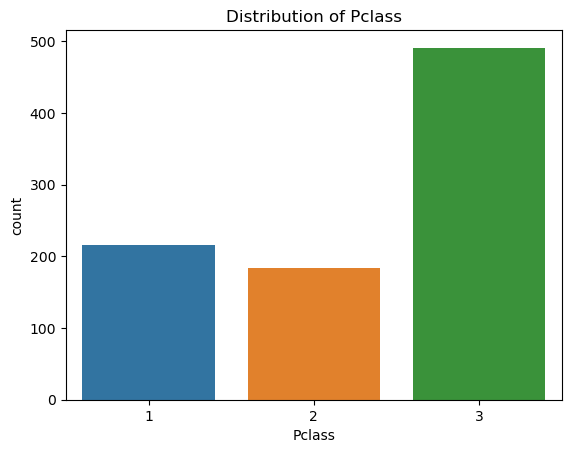

In [16]:
# Univariate analysis of 'Pclass'
sns.countplot(x='Pclass', data=train_df)
plt.title('Distribution of Pclass')
plt.show()

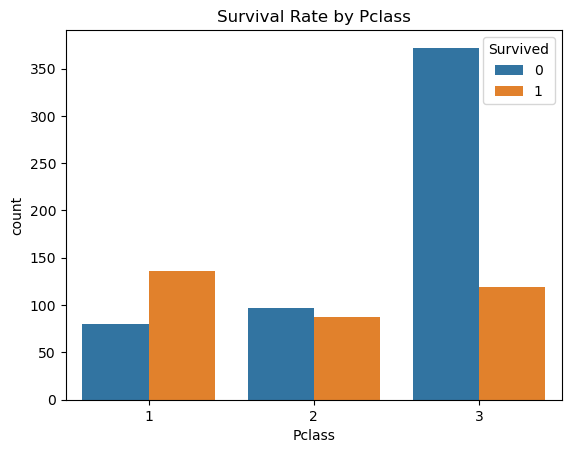

In [17]:
# Bivariate analysis of 'Survived' vs 'Pclass'
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Rate by Pclass')
plt.show()

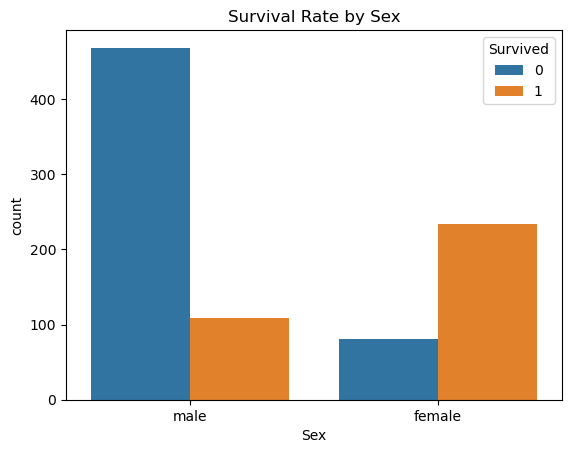

In [18]:
# Bivariate analysis of 'Survived' vs 'Sex'
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.show()

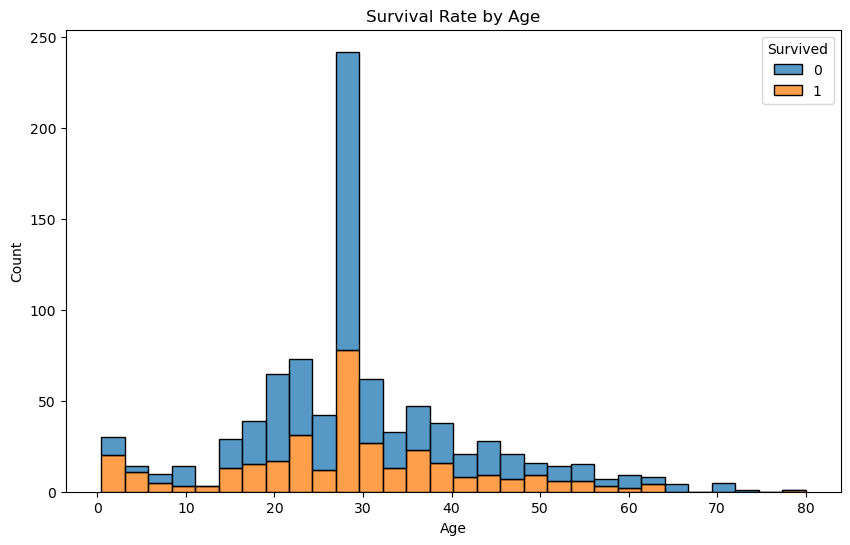

In [19]:
# Bivariate analysis of 'Survived' vs 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack')
plt.title('Survival Rate by Age')
plt.show()

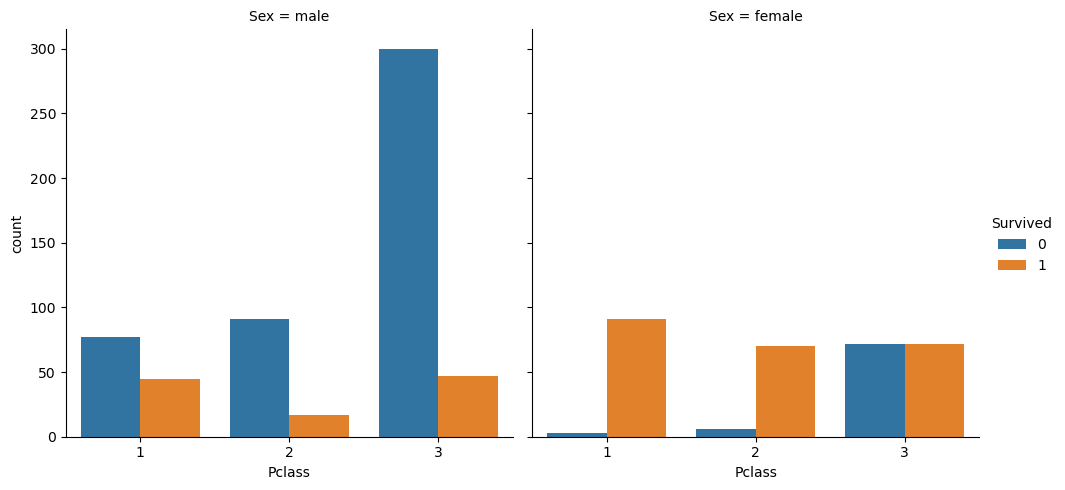

In [20]:
# Multivariate analysis of 'Survived', 'Pclass', and 'Sex'
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=train_df)
plt.show()

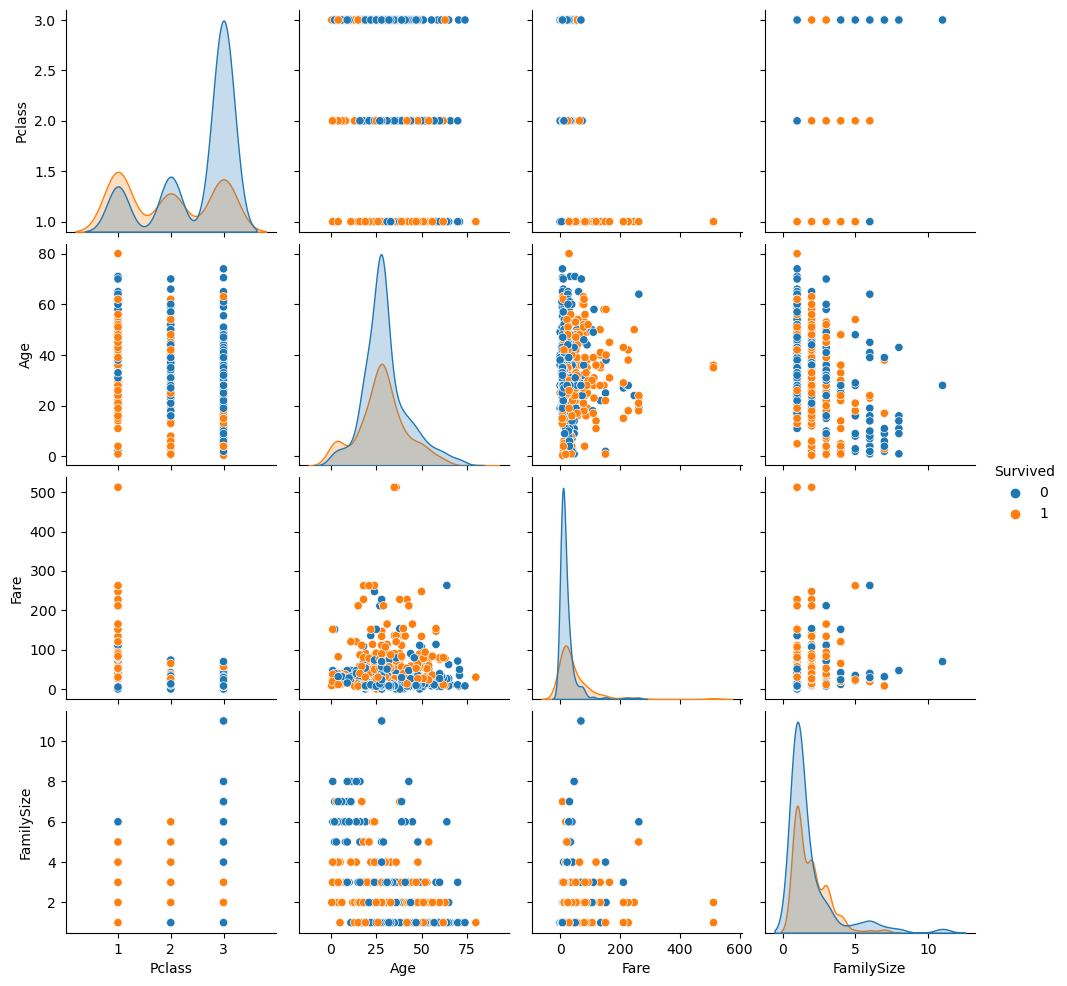

In [21]:
# Pairplot to explore interactions among multiple numerical features
sns.pairplot(train_df[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize']], hue='Survived')
plt.show()